# Movie Ratings Recommender System

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

In [178]:
df = pd.read_csv('full_data.csv')

## Exploring the dataset

In [179]:
df.head()

,Name of the movie,Link,Year released,IMDB rating,Number of reviewers,Censor board rating,Length of the movie,Genre 1,Genre 2,Genre 3,...,Star 1,Star 2,Star 3,Star 4,Star 5,Plot Keywords list,Budget,Gross USA,Cumulative worlwide Gross,Production company
0,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/,1994,9.3,2041643,R,2h22min,Drama,NaN,NaN,...,Tim Robbins,Morgan Freeman,Bob Gunton,NaN,NaN,wrongful imprisonment | escape from prison | b...,25000000.0,28341469.0,5.850000e+07,Castle Rock Entertainment
1,The Godfather,https://www.imdb.com/title/tt0068646/,1972,9.2,1400266,R,2h55min,Crime,Drama,NaN,...,Marlon Brando,Al Pacino,James Caan,NaN,NaN,mafia | crime family | patriarch | organized c...,6000000.0,134966411.0,2.450664e+08,Paramount Pictures
2,The Godfather: Part II,https://www.imdb.com/title/tt0071562/,1974,9.0,970681,R,3h22min,Crime,Drama,NaN,...,Al Pacino,Robert De Niro,Robert Duvall,NaN,NaN,revenge | corrupt politician | bloody body of ...,13000000.0,57300000.0,NaN,Paramount Pictures
3,The Dark Knight,https://www.imdb.com/title/tt0468569/,2008,9.0,2009174,PG-13,2h32min,Action,Crime,Drama,...,Christian Bale,Heath Ledger,Aaron Eckhart,NaN,NaN,dc comics | moral dilemma | psychopath | clown...,185000000.0,534858444.0,1.004558e+09,Warner Bros.
4,12 Angry Men,https://www.imdb.com/title/tt0050083/,1957,8.9,574770,NotRated,1h36min,Drama,NaN,NaN,...,Henry Fonda,Lee J. Cobb,Martin Balsam,NaN,NaN,jury | dialogue driven | courtroom | trial | p...,350000.0,4360000.0,NaN,Orion-Nova Productions


In [180]:
df.columns

Index(['Name of the movie', 'Link', 'Year released', 'IMDB rating',
       'Number of reviewers', 'Censor board rating', 'Length of the movie',
       'Genre 1', 'Genre 2', 'Genre 3', 'Genre 4', 'Release date',
       'story summary', 'Director Name', 'Writer 1', 'Writer 2', 'Writer 3',
       'Star 1', 'Star 2', 'Star 3', 'Star 4', 'Star 5', 'Plot Keywords list',
       'Budget', 'Gross USA', 'Cumulative worlwide Gross',
       'Production company'],
      dtype='object')

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 27 columns):
Name of the movie            250 non-null object
Link                         250 non-null object
Year released                250 non-null int64
IMDB rating                  250 non-null float64
Number of reviewers          250 non-null int64
Censor board rating          248 non-null object
Length of the movie          250 non-null object
Genre 1                      250 non-null object
Genre 2                      223 non-null object
Genre 3                      141 non-null object
Genre 4                      65 non-null object
Release date                 250 non-null object
story summary                250 non-null object
Director Name                249 non-null object
Writer 1                     250 non-null object
Writer 2                     195 non-null object
Writer 3                     121 non-null object
Star 1                       250 non-null object
Star 2         

We have a dataset of 250 observations

## Target Variable

here the **IMDB Rating** is the target variable that we will predict for a movie based on the relevant features.

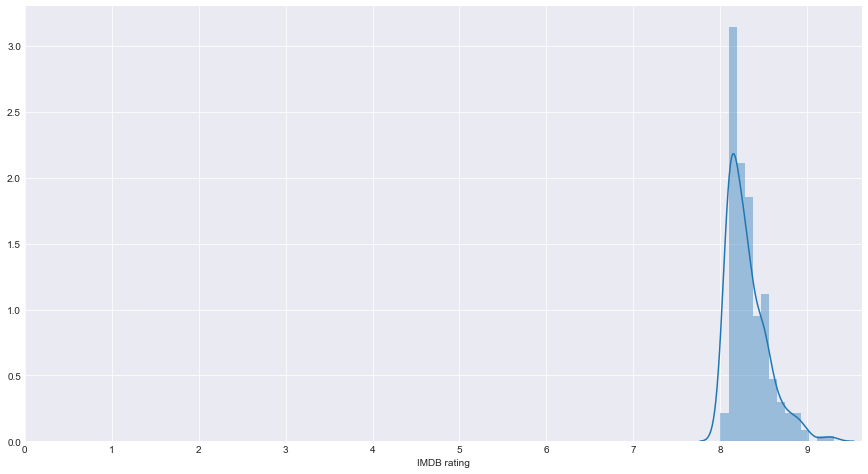

In [182]:
plt.figure(figsize= (15,8))
sns.distplot(df['IMDB rating'])
plt.xticks(list(range(0,10)))
plt.show()

Our movies rating distribution is extremely left skewed.  
Most of the movie have the rating around 8 as seen from the above histogram.  
So our model may not be able to predict ratings below 8.

## Feature Selection

### Number of Revieweres

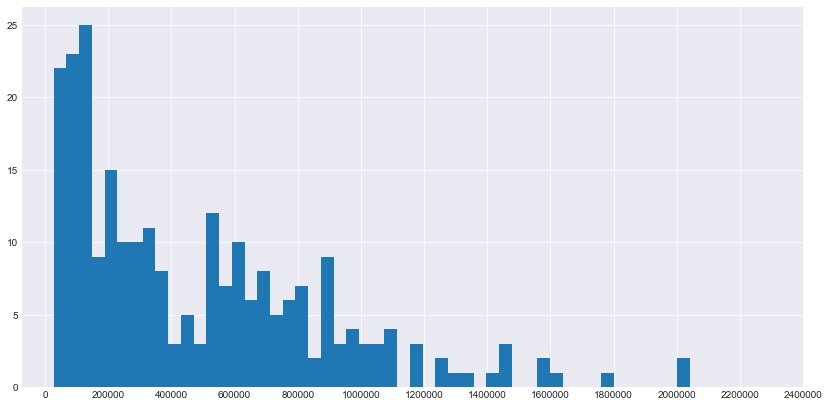

In [183]:
plt.figure(figsize=(14,7))
plt.hist(df['Number of reviewers'], bins = 50 )
plt.xticks(list(range(0,2500000, 200000)))
plt.show()

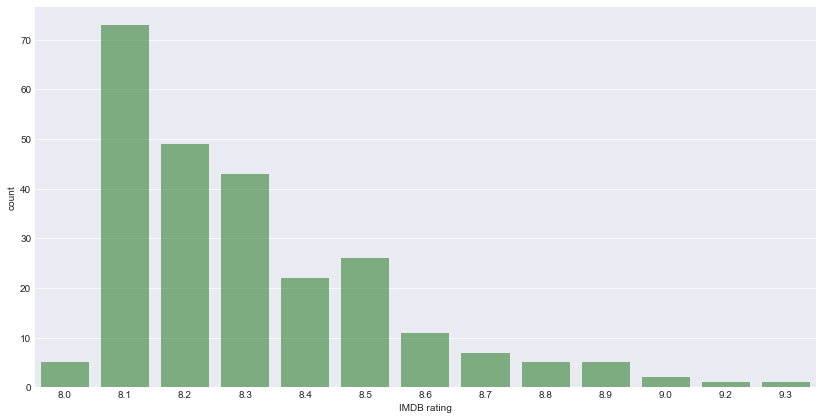

In [184]:
plt.figure(figsize=(14,7))
sns.countplot(df['IMDB rating'],color= 'g', alpha = 0.5)
plt.show()

So most of the ratings are 8.1 to different movies

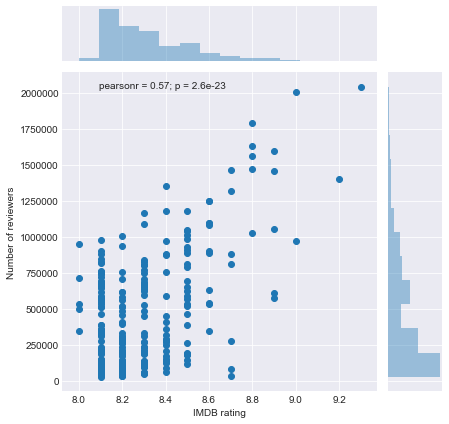

In [185]:
sns.jointplot(df['IMDB rating'], df['Number of reviewers'])
plt.show()

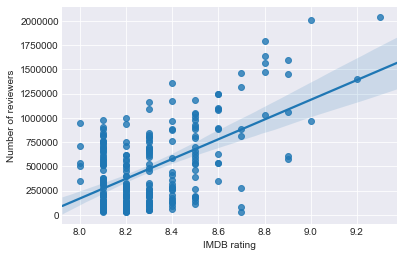

In [186]:
sns.regplot(df['IMDB rating'], df['Number of reviewers'])
plt.show()

Although there's not a significnt pearson correlation between the ratings and the number of reviewers but there seems a linear relationship between them.  
So we can try including this as feature if the error score improves.

### Genre

So from the above information we ca see that there are first set of missing values in the **Genre 2, 3, 4** and like any of the features in this dataset these are not imputable, we can't just fill them out withour any caveats. So we will only consider the Genre 1 as our genre of the movie.  


In [187]:
df['Genre 1'].unique()

array([' Drama', ' Crime', ' Action', ' Adventure', ' Biography',
       ' Western', ' Animation', 'Comedy', ' Comedy', ' Horror',
       ' Mystery', ' Film-Noir', ' Sci-Fi'], dtype=object)

We can see that there are two separate values of the same *Comedy* genre because of an extra whitespace in some entries so we need correction to map all those as one single *Comedy* genre.   
Since every genre name has extra whitespace we will convert the entries without whitespace to the ones with whitespace as prefix.


In [188]:
df['Genre 1'].replace('Comedy', ' Comedy', inplace = True)

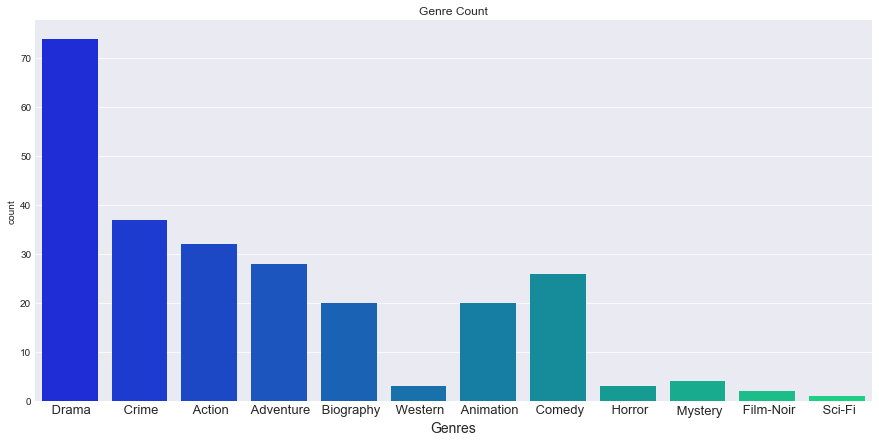

In [189]:
plt.figure(figsize = (15,7))
sns.countplot(df['Genre 1'], palette = 'winter')
plt.title('Genre Count')
plt.xticks(fontsize = 13)
plt.xlabel('Genres', fontsize = 14)
plt.show()

We can see that most of the movies are mainly *Drama*

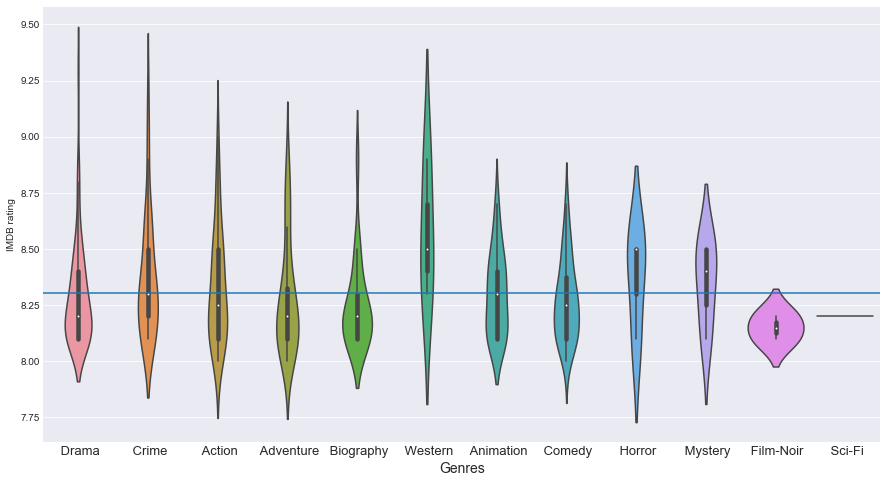

In [190]:
plt.figure(figsize= (15,8))
sns.violinplot(df['Genre 1'], df['IMDB rating'])
plt.axhline(df['IMDB rating'].mean())
plt.xticks(fontsize = 13)
plt.xlabel('Genres', fontsize = 14)
plt.show()

We can observe that  more than half of the *western* genre movies perform better than the average rating, same goes for other genres like mystery.  
But *western* movies have more variance in their ratigs than other ctegories while the Film - Noir Genre is least varying.

In [191]:
print("Number of Film-Noir genre: ",len(df[df['Genre 1'] == ' Film-Noir']))
print("Number of Western genre: ",len(df[df['Genre 1'] == ' Western']))
print("Number of Drama genre: ",len(df[df['Genre 1'] == ' Drama']))

Number of Film-Noir genre:  2
Number of Western genre:  3
Number of Drama genre:  74


So we can see that this plot doesn't really give a very unbiased idea of distribution of ratings since the different categories doesn't have sufficient observations for any conclusion.

### Year of release

In [192]:
type(df['Year released'][0])

numpy.int64

Since the *Year Released* is a integer type and we won't be require any months or days, we need not convert it into datetime format

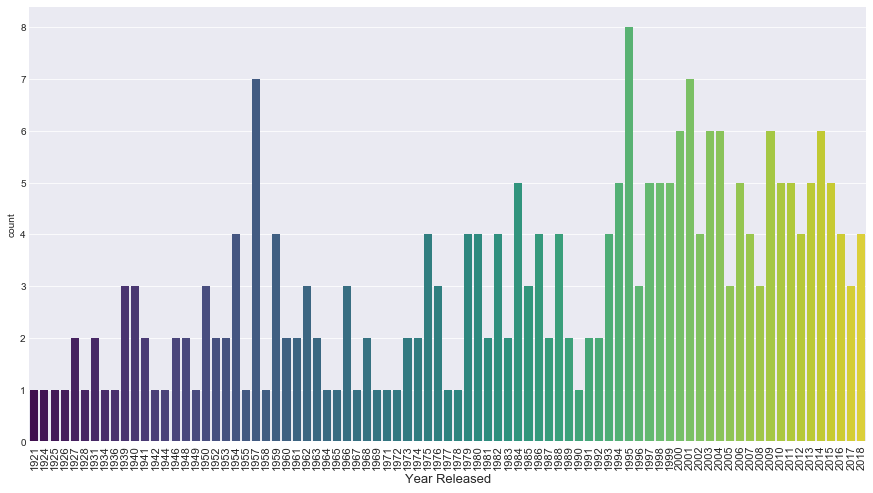

In [193]:
plt.figure(figsize= (15,8))
f = sns.countplot(df['Year released'], palette = 'viridis')
f.set_xticklabels(f.get_xmajorticklabels(), rotation = 90)
plt.xticks(fontsize = 11)
plt.xlabel('Year Released', fontsize = 13)
plt.show()

The most number of movies related was in the year *1995* and then in the years *2001, 1957*

Now we check how much rating is dependent on the year of release

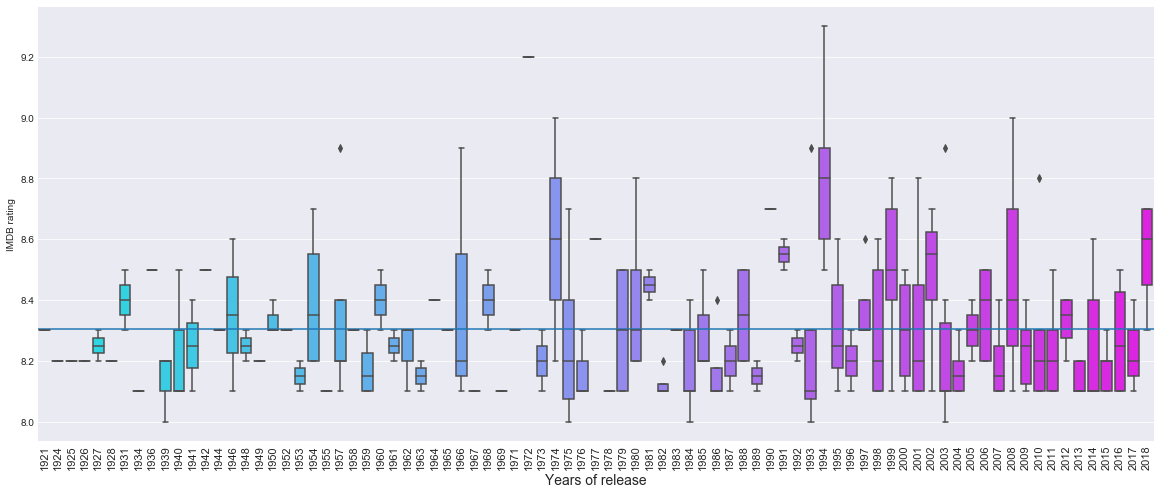

In [194]:
plt.figure(figsize= (20,8))
f = sns.boxplot(df['Year released'], df['IMDB rating'], palette = 'cool')
f.set_xticklabels(f.get_xticklabels(), rotation = 90)
plt.xticks(fontsize = 11)
plt.axhline(df['IMDB rating'].mean())
plt.xlabel('Years of release', fontsize = 14)
plt.show()

Rather than considering each year separately we can divide the *Years* in different categories of time. For easing the visualising.

In [195]:
df.loc[(df['Year released'] >= 1920) & (df['Year released'] < 1940), 'Year_Span'] = 'Early'
df.loc[(df['Year released'] >= 1940) & (df['Year released'] < 1960), 'Year_Span'] = 'Early_Mid'
df.loc[(df['Year released'] >= 1960) & (df['Year released'] < 1980), 'Year_Span'] = 'Mid'
df.loc[(df['Year released'] >= 1980) & (df['Year released'] < 2000), 'Year_Span'] = 'Mid_Modern'
df.loc[(df['Year released'] >= 2000) & (df['Year released'] <= 2019), 'Year_Span'] = 'Modern'

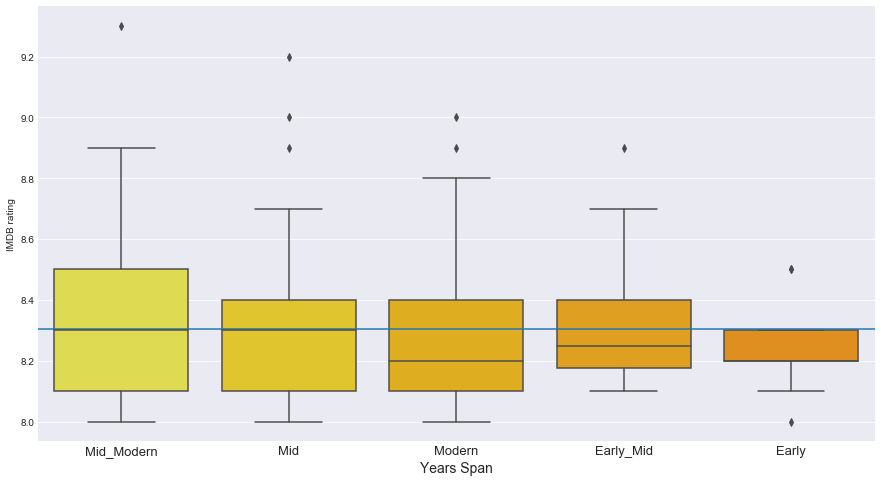

In [196]:
plt.figure(figsize= (15,8))
sns.boxplot(df['Year_Span'], df['IMDB rating'], palette = 'Wistia')
plt.xticks(fontsize = 13)
plt.axhline(df['IMDB rating'].mean())
plt.xlabel('Years Span', fontsize = 14)
plt.show()

The visualization is more assessible after categorizing the *Year released*

### Censor Board rating

In [197]:
df.groupby(df['Censor board rating']).mean()['IMDB rating']

Censor board rating
Approved    8.100000
G           8.284615
GP          8.100000
NotRated    8.250980
PG          8.278571
PG-13       8.386207
Passed      8.242857
R           8.329808
Name: IMDB rating, dtype: float64

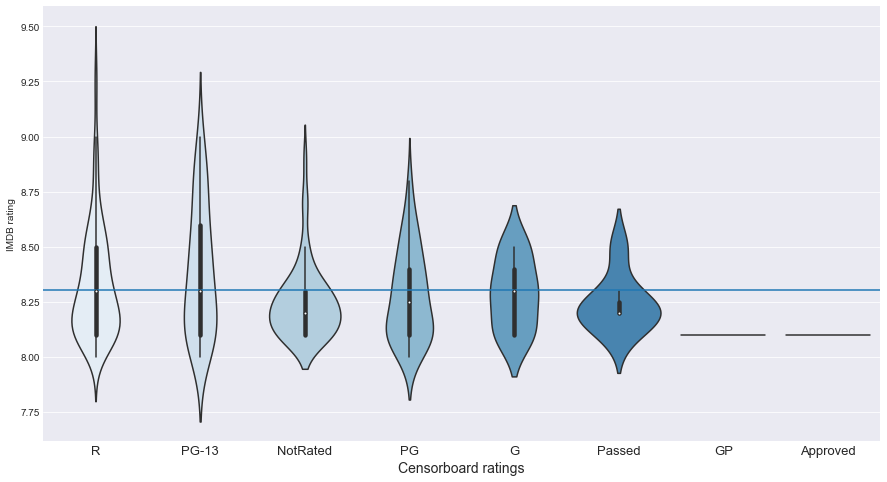

In [198]:
plt.figure(figsize= (15,8))
sns.violinplot(df['Censor board rating'], df['IMDB rating'], palette = 'Blues')
plt.xticks(fontsize = 13)
plt.axhline(df['IMDB rating'].mean())
plt.xlabel('Censorboard ratings', fontsize = 14)
plt.show()

### Length of the movie

In [199]:
df['Length of the movie'].unique()

array(['2h22min', '2h55min', '3h22min', '2h32min', '1h36min', '2h34min',
       '3h21min', '3h15min', '2h58min', '2h19min', '2h4min', '2h28min',
       '2h59min', '2h13min', '2h26min', '3h27min', '2h16min', '1h57min',
       '2h7min', '2h10min', '2h1min', '1h58min', '1h56min', '1h46min',
       '2h5min', '1h50min', '2h49min', '3h9min', '1h49min', '1h27min',
       '1h59min', '2h45min', '1h42min', '1h52min', '2h30min', '2h31min',
       '2h17min', '1h55min', '2h35min', '2h27min', '1h28min', '1h53min',
       '1h29min', '2h29min', '2h41min', '1h35min', '1h38min', '2h14min',
       '1h41min', '2h44min', '3h49min', '2h2min', '1h45min', '2h50min',
       '1h48min', '1h39min', '2h8min', '2h11min', '2h40min', '3h36min',
       '1h21min', '1h47min', '1h43min', '1h54min', '2h33min', '2h9min',
       '1h8min', '2h6min', '1h31min', '2h12min', '2h18min', '2h3min',
       '2h20min', '2h23min', '2h43min', '2h36min', '2h52min', '1h26min',
       '1h33min', '2h42min', '3h6min', '2h15min', '3h', '1h7mi

We need to find a way to parse it so that we could analyze the ratings based on the length of the movie

In [200]:
df.loc[df['Length of the movie'] == '3h', 'Length of the movie'] = '3h0min'
df.loc[df['Length of the movie'] == '2h', 'Length of the movie'] = '2h0min'

This above is a little tweak we did for our method to work in the next step of parsing

In [201]:
df['length in mins'] = df['Length of the movie'].apply(lambda x: x.replace('h','*60+'))
df['length in mins'] = df['length in mins'].apply(lambda x: x.replace('min',''))
df['length in mins'] = df['length in mins'].apply(lambda x: eval(x))

In [202]:
print("Length before parse: ",df['Length of the movie'][0])
print("Length after parse: ",df['length in mins'][0])

Length before parse:  2h22min
Length after parse:  142


In [203]:
df['length in mins'].unique()

array([142, 175, 202, 152,  96, 154, 201, 195, 178, 139, 124, 148, 179,
       133, 146, 207, 136, 117, 127, 130, 121, 118, 116, 106, 125, 110,
       169, 189, 109,  87, 119, 165, 102, 112, 150, 151, 137, 115, 155,
       147,  88, 113,  89, 149, 161,  95,  98, 134, 101, 164, 229, 122,
       105, 170, 108,  99, 128, 131, 160, 216,  81, 107, 103, 114, 153,
       129,  68, 126,  91, 132, 138, 123, 140, 143, 163, 156, 172,  86,
        93, 162, 186, 135, 180,  67, 158, 238,  45,  94, 205, 157, 321,
       183, 100, 111,  92, 120,  83, 212, 141, 185, 191, 144,  80, 145,
       188, 224], dtype=int64)

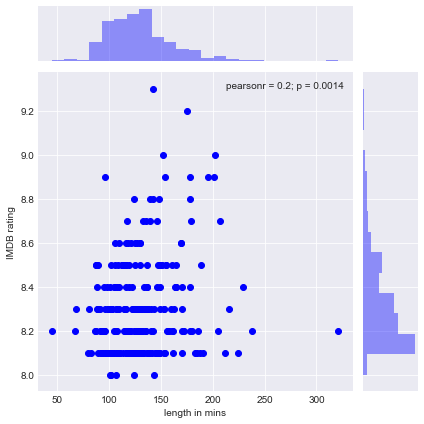

In [204]:
sns.jointplot(df['length in mins'], df['IMDB rating'], color= 'b')
plt.show()

Since there's no linear relationship between ratings and the length and the correlations coefficient is also very low.  
So looks like there's not much we can figure about the ratings from the length of the movies.

### Budget

In [205]:
df['Budget'] = df.fillna(0)['Budget']

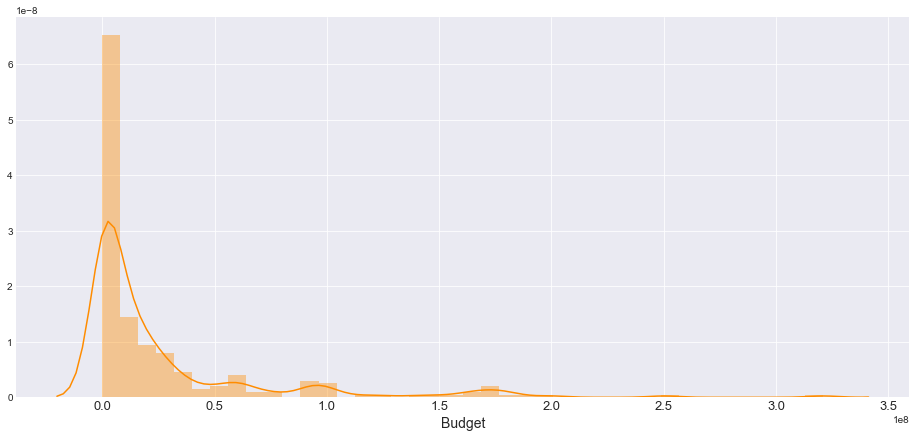

In [206]:
plt.figure(figsize=(16,7))
f = sns.distplot(df['Budget'], color = 'darkorange')
plt.xticks(fontsize = 13)
plt.xlabel('Budget', fontsize = 14)
plt.show()

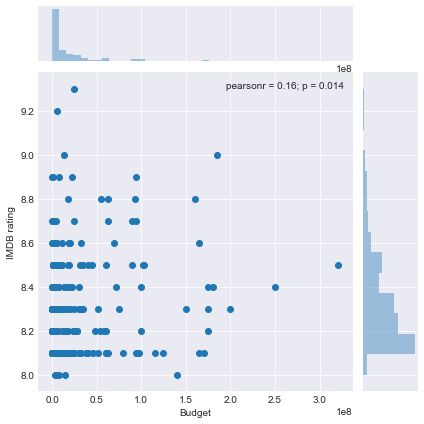

In [207]:
sns.jointplot(df['Budget'], df['IMDB rating'])
plt.show()

There's no direct relationship between the baudget and the ratings of the movies

In [208]:
df.columns

Index(['Name of the movie', 'Link', 'Year released', 'IMDB rating',
       'Number of reviewers', 'Censor board rating', 'Length of the movie',
       'Genre 1', 'Genre 2', 'Genre 3', 'Genre 4', 'Release date',
       'story summary', 'Director Name', 'Writer 1', 'Writer 2', 'Writer 3',
       'Star 1', 'Star 2', 'Star 3', 'Star 4', 'Star 5', 'Plot Keywords list',
       'Budget', 'Gross USA', 'Cumulative worlwide Gross',
       'Production company', 'Year_Span', 'length in mins'],
      dtype='object')

In [209]:
drop_cols = ['Genre 2', 'Genre 3', 'Genre 4',]

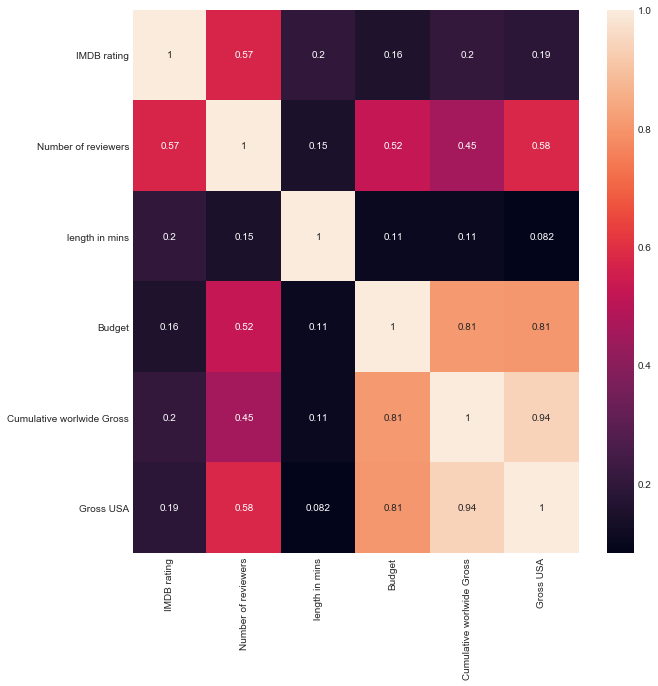

In [210]:
plt.figure(figsize= (10,10))
sns.heatmap(df[['IMDB rating','Number of reviewers','length in mins','Budget','Cumulative worlwide Gross','Gross USA']].corr(), annot = True)

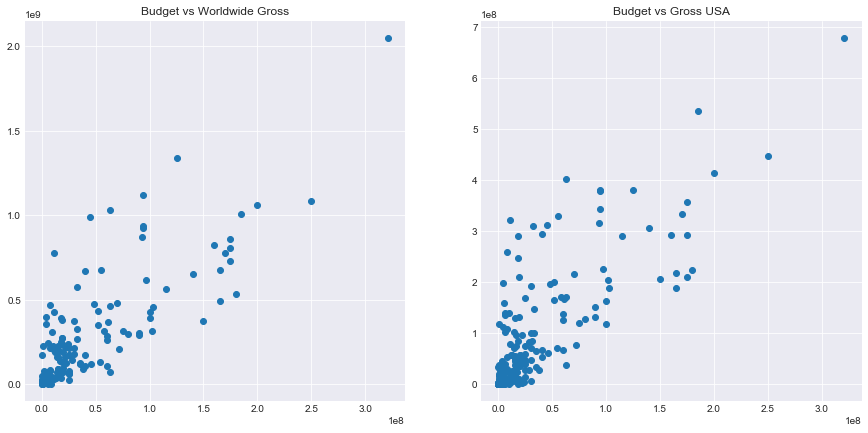

In [211]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.scatter(df['Budget'],df['Cumulative worlwide Gross'])
plt.title('Budget vs Worldwide Gross')
plt.subplot(1,2,2)
plt.scatter(df['Budget'],df['Gross USA'])
plt.title('Budget vs Gross USA')
plt.show()

Although there is no relationship between the *Ratings* and the *Budget* but there's a strong relationship between *Budget* and *Cumulative World Gross* (Revenue) so we only need to include only one of the features to remove ***multicollinearity***

### Directors Name

In [212]:
temp = df.groupby(df['Director Name']).mean()[['Cumulative worlwide Gross','Gross USA']]

In [213]:
top10direc = temp.sort_values(by = 'Cumulative worlwide Gross', ascending= False).head(10)
top10direc.reset_index(inplace = True)

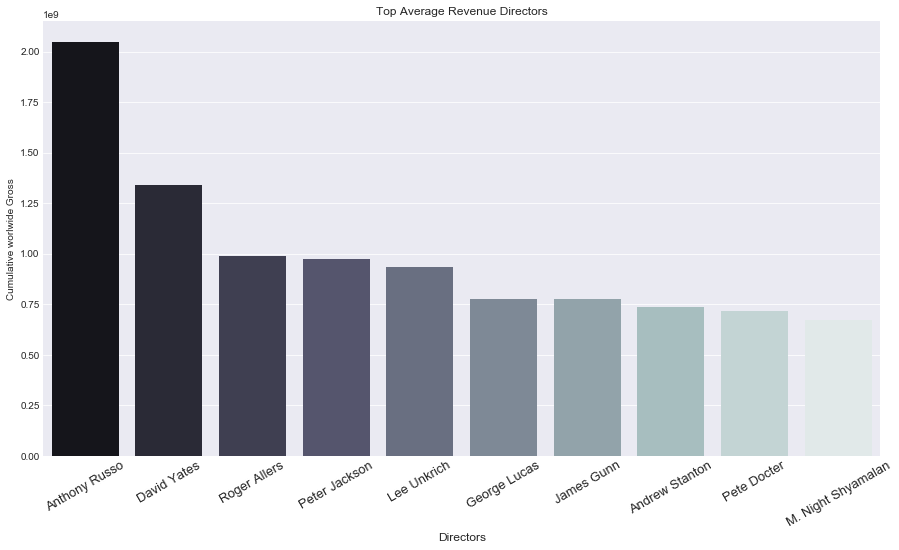

In [214]:
plt.figure(figsize= (15,8))
f= sns.barplot(top10direc['Director Name'], top10direc['Cumulative worlwide Gross'], palette = 'bone')
f.set_xticklabels(f.get_xticklabels(), rotation = 30)
plt.xticks(fontsize = 13)
plt.xlabel('Directors', fontsize = 12)
plt.title('Top Average Revenue Directors')
plt.show()

## Building the Model

#### Selecting Features

In [291]:
X_full = df[['Genre 1','Budget','Censor board rating','Year_Span','Number of reviewers']]

### Converting categorical data to numerical

In [284]:
def genre_num(x):
    if x == ' Drama':
        return 0
    elif x == ' Crime':
        return 1
    elif x == ' Action':
        return 2
    elif x == ' Adventure':
        return 3
    elif x == ' Biography':
        return 4
    elif x == ' Western':
        return 5
    elif x == ' Animation':
        return 6
    elif x == ' Comedy':
        return 7
    elif x == ' Horror':
        return 8
    elif x == ' Mystery':
        return 9
    elif x == ' Film-Noir':
        return 10
    else:
        return 11
    

In [285]:
def censor_num(x):
    if x == 'R':
        return 0
    elif x == 'PG-13':
        return 1
    elif x == 'NotRated':
        return 2
    elif x == 'PG':
        return 3
    elif x == 'G':
        return 4
    elif x == 'Passed':
        return 5
    elif x == 'GP':
        return 6
    else:
        return 7

    

In [286]:
def year_num(x):
    if x == 'Early':
        return 0
    elif x == 'Early_Mid':
        return 1
    elif x == 'Mid':
        return 2
    elif x == 'Mid_Modern':
        return 3
    else:
        return 4

    

In [293]:
X_full['Genre 1'] = X_full['Genre 1'].apply(genre_num)
X_full['Censor board rating'] = X_full['Censor board rating'].apply(censor_num)
X_full['Year_Span'] = df['Year_Span'].apply(year_num)

In [296]:
X_full = X_full.iloc[:, :].values

In [297]:
y_full = df['IMDB rating']
y_full = y_full.values

### Now we scale the features

We use the **Standar Scaling Equation**  
![image](https://camo.githubusercontent.com/24be7c6887f8c94354ceab7f3ed58a7159d65a80/68747470733a2f2f73332d61702d736f7574682d312e616d617a6f6e6177732e636f6d2f61762d626c6f672d6d656469612f77702d636f6e74656e742f75706c6f6164732f323031352f30392f32343037313030372f5a2d73636f72652d666f726d2e706e67)

In [298]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_full)
X_full = sc.transform(X_full)

In [299]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size = 0.25, random_state = 1)

In [300]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Predicting on Test set

In [301]:
y_pred = regressor.predict(X_test)

### Evaluation

#### Mean Squared Error

In [302]:
def MSE(true, pred, len_y):
    tot = sum((true - pred) ** 2)
    tot = tot/len_y
    return tot

In [303]:
print("The Mean Squared Error for our Model is: ",MSE(y_test, y_pred, len(y_test)))

The Mean Squared Error for our Model is:  0.036841237081686844
